# Kara One - Transduction

## Load Dataset

In [73]:
from lib import KaraOneDataset

dataset_dir = "C:\\Users\\win8t\\OneDrive\\Desktop\\projects\\kara-one-transduction\\p"
# dataset = KaraOneDataset(dataset_dir, start_idx=0, end_idx=165, n_mel_channels=128)
dataset = KaraOneDataset(dataset_dir, start_idx=0, end_idx=165, n_mel_channels=80, eeg_types=["vocal", "imagined"])

init() end_idx: 165
PATH: C:\Users\win8t\OneDrive\Desktop\projects\kara-one-transduction\p\spoclab/users/szhao/EEG/data/MM05\Acquisition 232 Data.cnt
Reading 0 ... 2477399  =      0.000 ...  2477.399 secs...
EEG_RAW: <RawCNT | Acquisition 232 Data.cnt, 62 x 2477400 (2477.4 s), ~1.14 GB, data loaded>
init-2() end_idx: 165
calc feat prompts: 165
165
end_idx: 165
Calc: 0.598s 0 ['/uw/']
Calc: 0.585s 1 ['/tiy/']
Calc: 0.668s 2 ['/tiy/']
Calc: 0.599s 3 ['/uw/']
Calc: 0.606s 4 ['/iy/']
Calc: 0.629s 5 ['/m/']
Calc: 0.552s 6 ['/n/']
Calc: 0.671s 7 ['/iy/']
Calc: 0.628s 8 ['/n/']
Calc: 0.576s 9 ['/piy/']
Calc: 0.659s 10 ['/uw/']
Calc: 0.520s 11 ['/tiy/']
Calc: 0.636s 12 ['/iy/']
Calc: 0.611s 13 ['/diy/']
Calc: 0.523s 14 ['/n/']
Calc: 0.590s 15 ['/iy/']
Calc: 0.533s 16 ['/tiy/']
Calc: 0.629s 17 ['/piy/']
Calc: 0.535s 18 ['/tiy/']
Calc: 0.598s 19 ['/n/']
Calc: 0.584s 20 ['/m/']
Calc: 0.522s 21 ['/m/']
Calc: 0.592s 22 ['/diy/']
Calc: 0.533s 23 ['/uw/']
Calc: 0.614s 24 ['/piy/']
Calc: 0.539s 25 ['/

In [74]:
import numpy as np
i = 0
dataset[i]["eeg_vocal_raw"].shape, dataset[i]["eeg_vocal_feats"].shape, dataset[i]["audio_feats"].shape

((903, 62), (148, 310), (135, 80))

## Single Channel Analysis

From: [Paper](http://www.cs.toronto.edu/~complingweb/data/karaOne/ZhaoRudzicz15.pdf)

Pearson correlation coefficients between audio features and imagined speech EEG features

|Sensor | FC6    | FT8 |  C5 | CP3|  P3 |
| - | - | - | - | - | - |
|Mean r | 0.3781 | 0.3758 | 0.3728 | 0.3720 | 0.3696 |

| Sensor | T7 | CP5 | C3 | CP1 |C4 |
| - | - | - | - | - | - |
Mean r | 0.3686|  0.3685|  0.3659| 0.3626 |0.3623

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def plot_eeg(eeg_type, target_channels, idx, feat=False):
    plt.rcParams["figure.figsize"] = (14, 9)

    if not target_channels:
        target_channels = dataset.eeg_data.ch_names
    
    print("target_channels:", target_channels)
    
    print(dataset.eeg_data)

    keep_idx_s = [dataset.eeg_data.ch_names.index(target_ch)
                for target_ch in target_channels]

    example = dataset[idx]
    print(example["label"])
    eeg_data = example[eeg_type]
    # eeg_data = eeg_data - eeg_data.mean(axis=1, keepdims=True)
    print("eeg data shape:", eeg_data.shape)

    if feat:
        eeg_data = np.asarray(np.split(eeg_data, 62))
    
    for idx in keep_idx_s:
        print("idx:", idx)
        label = dataset.eeg_data.ch_names[idx]
        if feat:
            data = eeg_data[idx, 16]
        else:
            # data = eeg_data[:903, idx]
            # data = eeg_data[:, idx]
            data = eeg_data[:, (idx*5)+1]
            # data = eeg_data[:, (idx*5)+2] # working (p_r, rms)
        data = data - data.mean(axis=0, keepdims=True)
        # print(eeg_data.shape)
        # print(data.shape, eeg_data.shape, eeg_data.shape[1] / 1000, data)
        print("CUR ELECTRODE DATA:", data.shape)
        plt.plot(data, label=label)
        print(len(data), len(data / max(data)))

    plt.legend(loc="upper left")
    # plt.axvspan(xmin=435, xmax=668, color="green", alpha=0.5)
    # plt.axvspan(xmin=451, xmax=553, color="red", alpha=0.5)
    # plt.axvspan(xmin=397, xmax=532, color="red", alpha=0.5)
    plt.show()

target_channels = "FC6 FT8 C5 CP3 P3 T7 CP5 C3 CP1 C4".split(" ") # top 10
# target_channels = "FC6 FT8 C5 CP3 CP5 C3 CP1 C4".split(" ") # top 10 - T7 (temporal 7?)
# target_channels = target_channels[0:10]
# target_channels = []

target_channels: ['FC6', 'FT8', 'C5', 'CP3', 'P3', 'T7', 'CP5', 'C3', 'CP1', 'C4']
<RawCNT | Acquisition 232 Data.cnt, 62 x 2477400 (2477.4 s), ~1.14 GB, data loaded>
/uw/
eeg data shape: (148, 310)
idx: 21
CUR ELECTRODE DATA: (148,)
148 148
idx: 22
CUR ELECTRODE DATA: (148,)
148 148
idx: 24
CUR ELECTRODE DATA: (148,)
148 148
idx: 35
CUR ELECTRODE DATA: (148,)
148 148
idx: 45
CUR ELECTRODE DATA: (148,)
148 148
idx: 23
CUR ELECTRODE DATA: (148,)
148 148
idx: 34
CUR ELECTRODE DATA: (148,)
148 148
idx: 25
CUR ELECTRODE DATA: (148,)
148 148
idx: 36
CUR ELECTRODE DATA: (148,)
148 148
idx: 29
CUR ELECTRODE DATA: (148,)
148 148


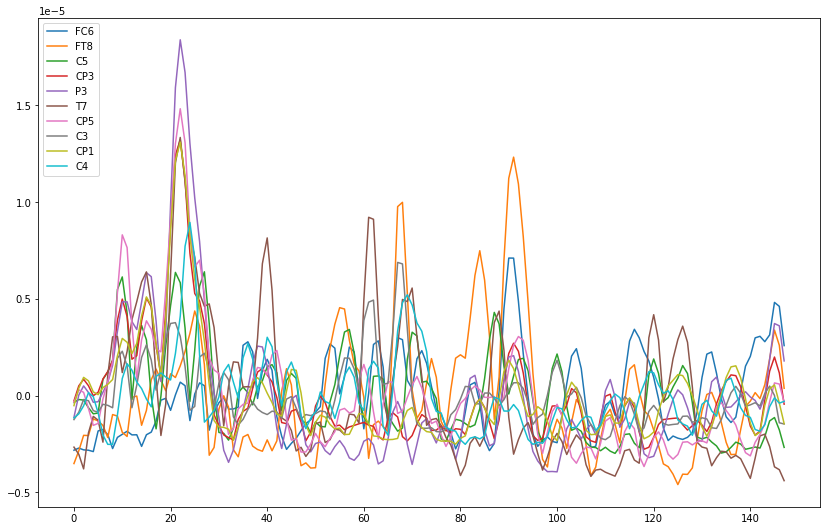

target_channels: ['FC6', 'FT8', 'C5', 'CP3', 'P3', 'T7', 'CP5', 'C3', 'CP1', 'C4']
<RawCNT | Acquisition 232 Data.cnt, 62 x 2477400 (2477.4 s), ~1.14 GB, data loaded>
/uw/


KeyError: 'eeg_active_feats'

In [25]:
for i in [0,1]:
    plot_eeg("eeg_vocal_feats", target_channels, idx=i, feat=False)
    plot_eeg("eeg_active_feats", target_channels, idx=i, feat=False)
# target_channels

### Audio Visualisation

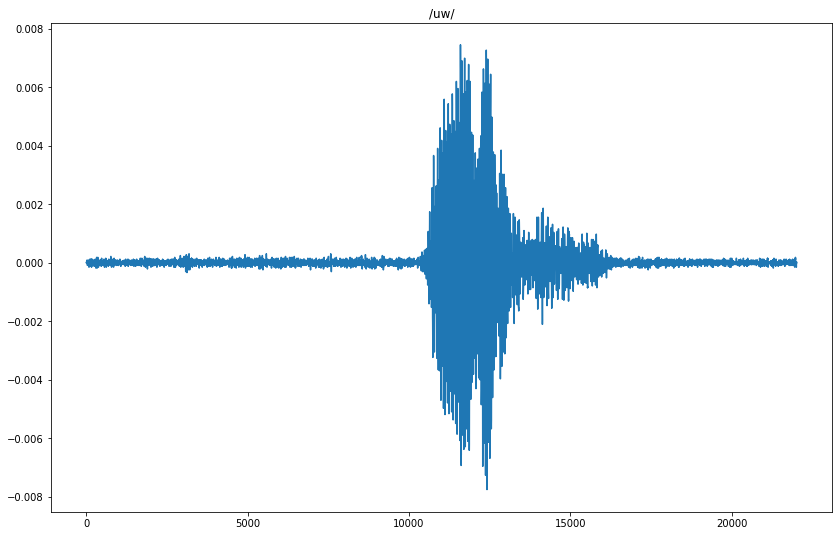

1.376


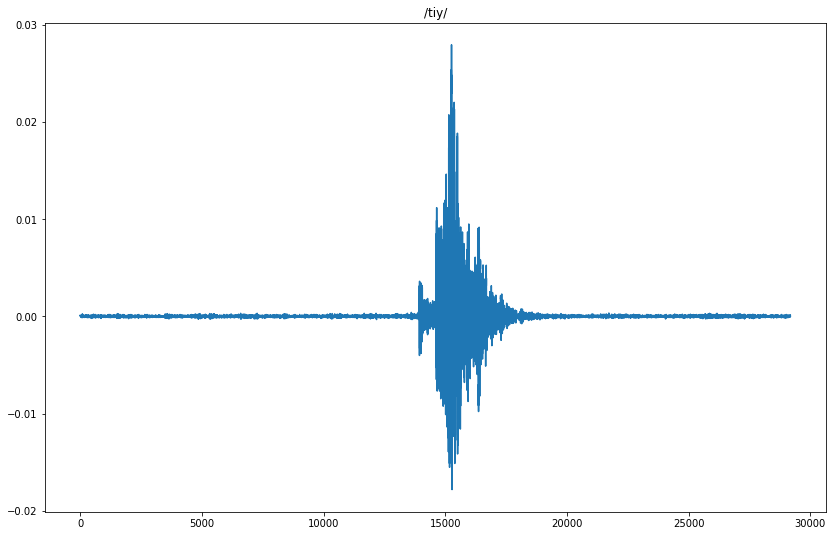

1.824


In [26]:
for i in [0, 1]:
    example = dataset[i]
    plt.title(example["label"])
    plt.plot(example["audio_raw"])
    plt.show()
    print(len(example["audio_raw"]) / 16_000)

### Mel Spectrogram of Audio (Vocalised)

In [27]:
from matplotlib import cm

def plot_mel_spectrogram(mel_spec, title):
    fig, ax = plt.subplots(1)

    ax.set_title(f"Mel Spectogram \"{title}\"")
    pred = np.swapaxes(mel_spec, 0, 1)
    cax = ax.imshow(pred, interpolation='nearest', cmap=cm.coolwarm, origin='lower')

    return fig

(135, 80)


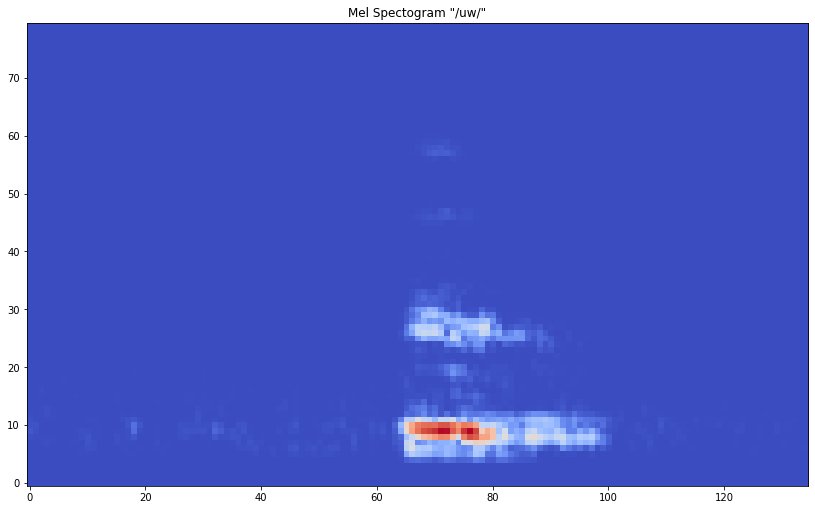

In [28]:
for i in [0]: # range(1):
    example_mel_spec = dataset[i]["audio_feats"]
    print(example_mel_spec.shape)
    plot_mel_spectrogram(example_mel_spec, dataset[i]["label"])

## Single Synthesis (Overfit)

### Model

In [16]:
# synth_examples = [dataset[0], dataset[1]]

synth_example = dataset[0]

import torch
import random

from lib.transduction import DigitalVoicingModel, ProposedModel

electrode_slice = 62 # 62
ins = 5 * electrode_slice # 5 hand-crafted features * 62 electrodes
outs = 80 # n mels

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model_type = "lstm" # "transformer"

if model_type == "lstm":
    model = DigitalVoicingModel(
        ins=ins,
        model_size=128,
        n_layers=2,
        dropout=0.0,
        outs=outs).to(device)
elif model_type == "transformer":
    model = ProposedModel(\
        model_size=ins,
        dropout=0.2,
        num_layers=8,
        n_heads=2,
        dim_feedforward=3072,
        out_dim=outs).to(device)

### Training

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

print("MODEL TYPE:", model_type)

X = torch.tensor(synth_example["eeg_vocal_feats"]).to(device)
y = torch.tensor(synth_example["audio_feats"]).to(device)

# clip sizes to smallest of both
clip_len = min(X.shape[0], y.shape[0])

X = X[:clip_len, :ins]
y = y[:clip_len, :]

print(X.shape, y.shape)

X = torch.unsqueeze(X, 0)
y = torch.unsqueeze(y, 0)

# NOTE: 5e-4 at 20,000 epochs for vocal, 1e-3 at 10,000 epochs for imagined
lr = 5e-4 # 1e-3 # 5e-4 # 1e-3
optim = torch.optim.Adam(model.parameters(), lr=lr)

amp = True

epochs = 20_000 # 20_000 # 10_000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s = []
losses = []

# scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=1000, gamma=0.1)

for i in range(epochs):
    # optim.zero_grad()

    with torch.autocast(
        enabled=amp,
        dtype=torch.bfloat16,
        device_type=device):

        pred = model(X)
        loss = criteria(pred, y)

        if i % 100 == 0:
            pred_s.append(pred.cpu().detach())
            losses.append(loss.item())

        # plt.plot(loss.item())

            print(i, loss.item())

    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

    # scheduler.step()

MODEL TYPE: lstm
torch.Size([135, 310]) torch.Size([135, 80])
0 130.77980041503906
100 0.6051411628723145
200 0.24225251376628876
300 0.23708093166351318
400 0.23409198224544525
500 0.23156562447547913
600 0.22936959564685822
700 0.22800691425800323
800 0.22672343254089355
900 0.22589640319347382
1000 0.22471290826797485
1100 0.22403767704963684
1200 0.2234288901090622
1300 0.2227703332901001
1400 0.22168903052806854
1500 0.2204950600862503
1600 0.2193935513496399
1700 0.21896086633205414
1800 0.2182200402021408
1900 0.21737003326416016
2000 0.21658338606357574
2100 0.21596752107143402
2200 0.21526046097278595
2300 0.21454459428787231
2400 0.21402406692504883
2500 0.21366597712039948
2600 0.21305745840072632
2700 0.212441548705101
2800 0.2120542675256729
2900 0.21165387332439423
3000 0.21115340292453766
3100 0.210715651512146
3200 0.21019747853279114
3300 0.21031534671783447


KeyboardInterrupt: 

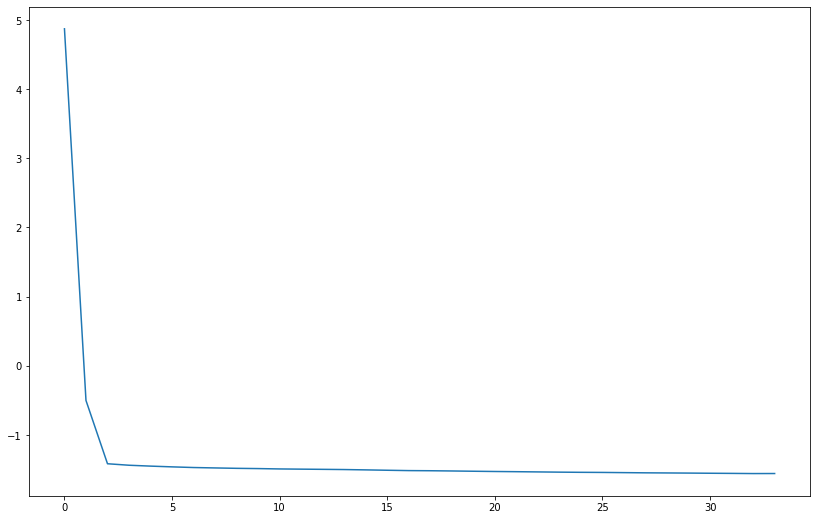

In [18]:
plt.plot(np.log(losses))

### Plot Pred

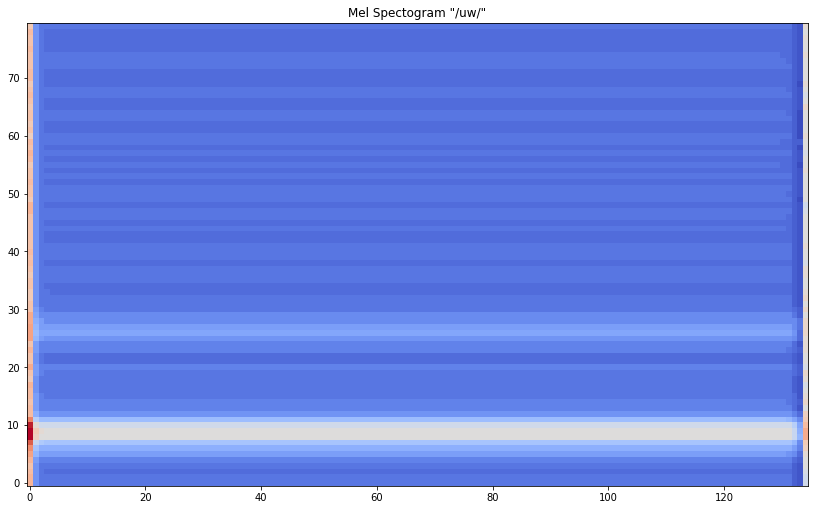

In [19]:
plt.rcParams["figure.figsize"] = (14, 9)

y = torch.squeeze(pred_s[len(pred_s) - 1], 0).float()
_ = plot_mel_spectrogram(y, synth_example["label"])

### Plot Original

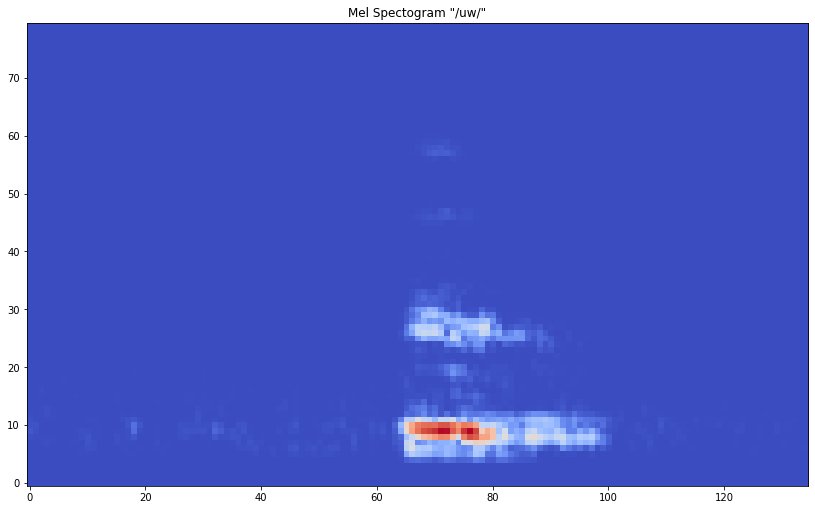

In [20]:
cur_ex = dataset[0]
_ = plot_mel_spectrogram(cur_ex["audio_feats"], cur_ex["label"])

## Multiple Synthesis (Overfit)

### Model

In [35]:
%%capture ignore

# Ignore data sample loading text

import torch
import random

from lib.transduction import DigitalVoicingModel

target_labels = ["/n/"]
synth_examples = [data for data in dataset if data["label"] in target_labels]
#synth_examples = [data for data in dataset]
#synth_examples = synth_examples[0:len(synth_examples)] # [:105]
[print(eg["label"]) for eg in synth_examples]

ratio = 0.8
pivot_point = int(len(synth_examples) * 0.8)
synth_examples = synth_examples[0:pivot_point]

electrode_slice = 62 # 62
ins = 5 * electrode_slice # 5 hand-crafted features * 62 electrodes
outs = 80 # n mels

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model = DigitalVoicingModel(
    ins=ins,
    model_size=64,
    n_layers=1,
    dropout=0.0,
    outs=outs).to(device)

### Training

In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

X_s = []
y_s = []

for synth_example in synth_examples:
    X = torch.tensor(synth_example["eeg_vocal_feats"]).to(device)
    # X = torch.tensor(synth_example["eeg_active_feats"]).to(device)
    y = torch.tensor(synth_example["audio_feats"]).to(device)
    clip_len = min(X.shape[0], y.shape[0])
    X = X[:clip_len, :ins]
    y = y[:clip_len, :]
    X = torch.unsqueeze(X, 0)
    y = torch.unsqueeze(y, 0)
    X_s.append(X)
    y_s.append(y)

# NOTE: 5e-4 for vocal EEG looked promising, try running for longer if ReduceLROnPlateau doesn't work
# NOTE: 1e-3 (0-1500), 5e-4 (1500-3000), 5e-4 (3000-4500)
lr = 5e-4 # 1e-3
optim = torch.optim.Adam(model.parameters(), lr=lr)

amp = True

# 20_000
epochs = 10_000 # 20_000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s = []
losses = []

# scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=1500, gamma=0.5)

model.train()

for i in range(epochs):
    # optim.zero_grad()

    cur_losses = []

    for X, y in zip(X_s, y_s):
        with torch.autocast(
            enabled=amp,
            dtype=torch.bfloat16,
            device_type=device):

            pred = model(X) 
            loss = criteria(pred, y)
            cur_losses.append(loss)
    
    loss = sum(cur_losses)

    if i % 100 == 0:
        losses.append(loss.item())
        print(i, loss.item())

    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

    # scheduler.step()

0 1555.8955078125
100 215.10848999023438
200 14.534089088439941
300 6.474761009216309


KeyboardInterrupt: 

### Testing

In [10]:
out_s = []

model.eval()

for X, y in zip(X_s, y_s):
    with torch.no_grad():
        pred = model(X)
        out_s.append(pred.cpu().detach())

([<matplotlib.lines.Line2D at 0x1ca3b3963d0>], 12)

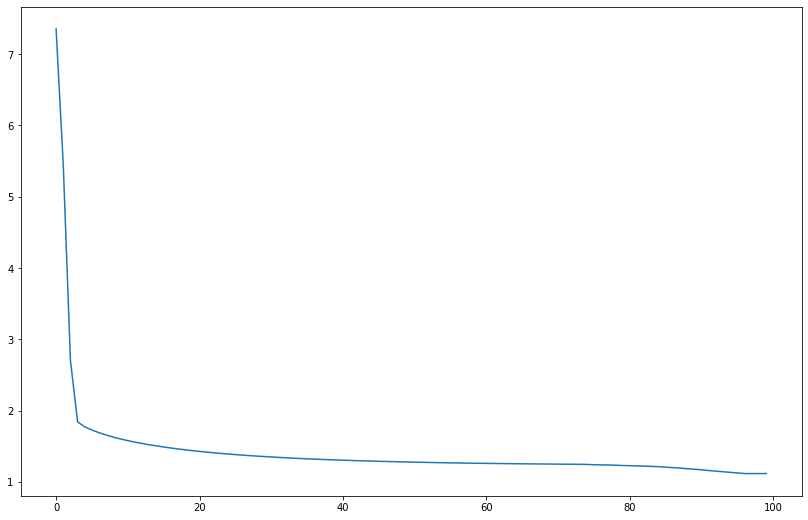

In [11]:
plt.plot(np.log(losses)), len(out_s)

### Plot Pred

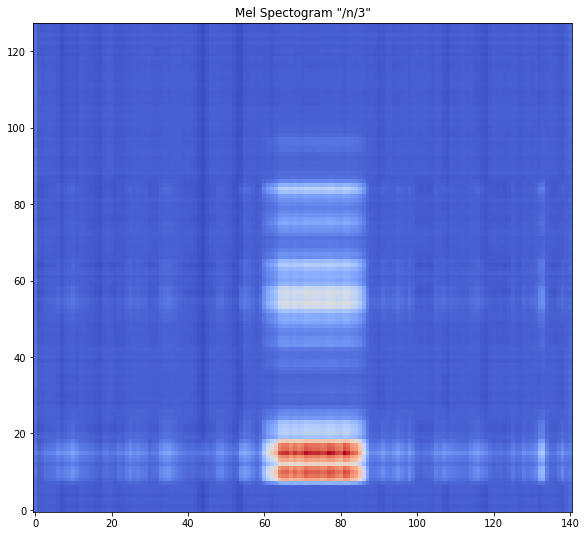

In [42]:
plt.rcParams["figure.figsize"] = (14, 9)

plot_pred_idx = 3
y = torch.squeeze(out_s[plot_pred_idx], 0).float()
_ = plot_mel_spectrogram(y, synth_examples[plot_pred_idx]["label"] + str(plot_pred_idx))

### Plot Original

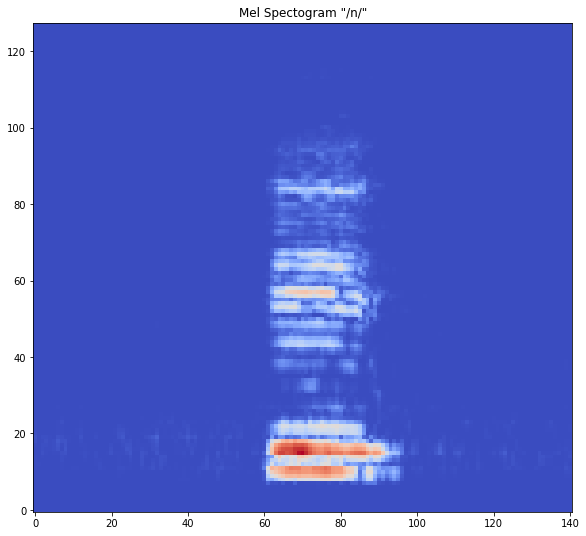

In [43]:
_ = plot_mel_spectrogram(synth_examples[plot_pred_idx]["audio_feats"], synth_examples[plot_pred_idx]["label"])

## Single Phoneme/Word Synthesis (Generalisation)

### Model

In [71]:
%%capture ignore

# Ignore data sample loading text

import torch
import random

from lib.transduction import DigitalVoicingModel

target_labels = ['/n/']
synth_examples_s = [[data for data in dataset if data["label"] in target_label]
                    for target_label in target_labels]

#synth_examples = [data for data in dataset]
#synth_examples = synth_examples[0:len(synth_examples)] # [:105]
[[print(eg["label"]) for eg in synth_examples]
 for synth_examples in synth_examples_s]

flatten = lambda lst: [item for sublist in lst for item in sublist]
ratio = 0.8
pivot_point = int(len(synth_examples_s[0]) * ratio)

trainset = [synth_examples[0:pivot_point]
            for synth_examples in synth_examples_s]
trainset = flatten(trainset)
testset  = [synth_examples[pivot_point:]
            for synth_examples in synth_examples_s]
testset  = flatten(testset)

electrode_slice = 62 # 62
ins = 5 * electrode_slice # 5 hand-crafted features * 62 electrodes
outs = 80 # 128 # n mels # 80 for waveglow

device = "cuda" if torch.cuda.is_available() else "cpu"

seed = 1
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

model_type = "transformer" # "transformer"

if model_type == "lstm":
    model_size = 128
    n_layers = 2
    dropout = 0.5

    model = DigitalVoicingModel(
        ins=ins,
        model_size=model_size,
        n_layers=n_layers,
        dropout=dropout,
        outs=outs).to(device)

elif model_type == "transformer":
    model_size=ins
    n_layers = 8
    dropout = 0.2
    n_heads = 2

    model = ProposedModel(\
        model_size=ins,
        dropout=dropout,
        num_layers=n_layers,
        n_heads=n_heads,
        dim_feedforward=3072,
        out_dim=outs).to(device)

### Train

In [72]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.cuda.amp.grad_scaler import GradScaler

import matplotlib.pyplot as plt

# Logging
from dotenv import dotenv_values
import neptune.new as neptune

config = dotenv_values(".env")

data_only = False

if not data_only:
    run = neptune.init(project=config["NEPTUNE_PROJECT"], api_token=config["NEPTUNE_TOKEN"])

EEG_TYPE = "imagined"

def fillset(synth_examples):
    X_s = []
    y_s = []
    for synth_example in synth_examples:
        if EEG_TYPE == "vocal":
            X = torch.tensor(synth_example["eeg_vocal_feats"]).to(device)
        elif EEG_TYPE == "imagined":
            X = torch.tensor(synth_example["eeg_active_feats"]).to(device)
        else:
            ValueError(f"{EEG_TYPE} is invalid!")
        y = torch.tensor(synth_example["audio_feats"]).to(device)
        clip_len = min(X.shape[0], y.shape[0])
        X = X[:clip_len, :ins]
        y = y[:clip_len, :]
        X = torch.unsqueeze(X, 0)
        y = torch.unsqueeze(y, 0)
        X_s.append(X)
        y_s.append(y)
    return X_s, y_s

train_X_s, train_y_s = fillset(trainset)
test_X_s,  test_y_s  = fillset(testset)

lr = 5e-4 # 1e-3
optim = torch.optim.Adam(model.parameters(), lr=lr)

amp = True

epochs = 20_000

scaler = GradScaler()

criteria = nn.MSELoss()

pred_s  = []
losses  = []
vlosses = []

params = {
    "initial_lr": lr,
    "optimizer": optim.__class__,
    "amp": amp,
    "target_labels": target_labels,
    "eeg_type": EEG_TYPE,
    "in_dim": ins,
    "out_dim": outs,
    "lstm_hidden_dim": model_size,
    "lstm_layers": n_layers,
    "random_seed": seed,
    "epochs": epochs,
    "model_type": model_type
}

# Add transformer specific logging
if n_heads:
    params = {**params, **{
        "n_heads": n_heads
    }}

if not data_only:
    run["parameters"] = params

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def test(model):
    model.eval()

    cur_losses = []

    for X, y in zip(test_X_s, test_y_s):
        with torch.no_grad():
            pred = model(X)
            loss = criteria(pred, y)
            cur_losses.append(loss)

    loss = sum(cur_losses)

    return loss.item()

def train(model, scheduler):
    model.train()

    # optim.zero_grad()

    cur_losses = []

    for X, y in zip(train_X_s, train_y_s):
        with torch.autocast(
            enabled=amp,
            dtype=torch.bfloat16,
            device_type=device):

            pred = model(X) 
            loss = criteria(pred, y)
            cur_losses.append(loss)
    
    loss = sum(cur_losses)

    scaler.scale(loss).backward()
    scaler.step(optim)
    scaler.update()

    if scheduler:
        scheduler.step()

    return loss.item()

def go(model):
    # scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=2000, gamma=0.1)
    scheduler = None

    min_mean_vloss = float("inf")

    for i in range(epochs):
        train_loss = train(model, scheduler)
        
        if i % 100 == 0:
            losses.append(train_loss)
            test_loss = test(model)
            vlosses.append(test_loss)
            run["loss"].log(train_loss)
            run["mean_loss"].log(train_loss / len(trainset))
            run["vloss"].log(test_loss)
            run["mean_vloss"].log(test_loss / len(testset))
            run["current_lr"].log(get_lr(optim))
            print(i, train_loss, test_loss)

            # sanitise phoneme tokens for model checkpoint filename
            out_target_labels = [label[1:-1] if label[0] == "/" else label
                                 for label in target_labels]
            label_str = "_".join(out_target_labels)
            cur_mean_vloss = test_loss / len(testset)

            if cur_mean_vloss < min_mean_vloss:
                torch.save(model.state_dict(), f"./models/{label_str}_{EEG_TYPE}_{i}_epochs_{cur_mean_vloss}_mean_vloss.pt")
                min_mean_vloss = cur_mean_vloss

    #label_str = "_".join(target_labels)
    #mean_vloss = test_loss / len(testset)
    #torch.save(model.state_dict(), f"./models/{label_str}_{EEG_TYPE}_20000_epochs_{mean_vloss}_mean_vloss.pt")

if not data_only:
    go(model)
    run.stop()

https://app.neptune.ai/miscellaneousstuff/imagined-speech-synth-transformer/e/IM2-5
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#.stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.


KeyError: 'eeg_active_feats'

In [ ]:
model.load_state_dict(torch.load("./models/transformer/m_vocal_300_epochs_0.21515220403671265_mean_vloss.pt"))

<All keys matched successfully>

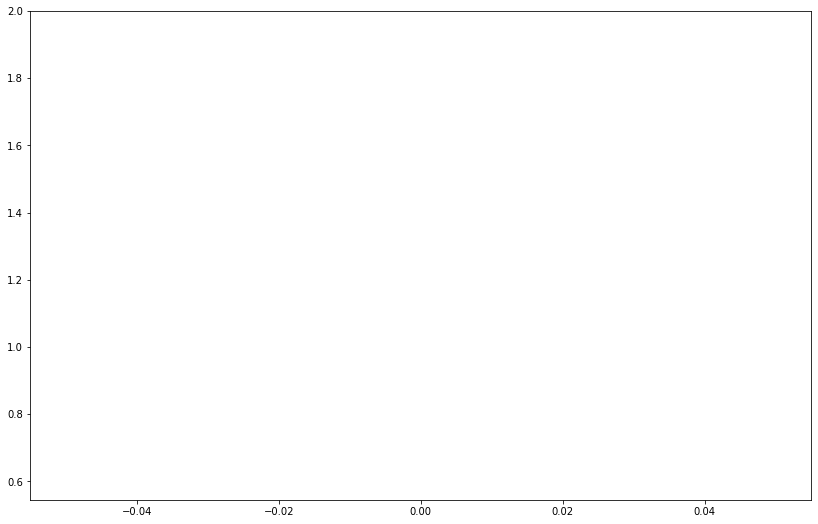

In [42]:
plt.plot(np.log(losses) / len(trainset))
plt.plot(np.log(vlosses) / len(testset))

#### Generate Predictions

In [43]:
out_s = []

model.eval()

view_X_s, view_y_s = test_X_s, test_y_s

for X, y in zip(view_X_s, view_y_s):
    with torch.no_grad():
        pred = model(X)
        out_s.append(pred.cpu().detach())

#### Plot Prediction

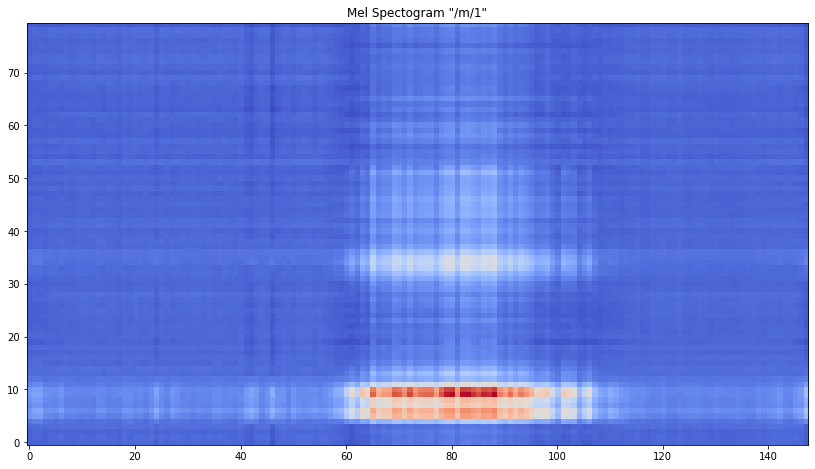

In [54]:
plt.rcParams["figure.figsize"] = (14, 9)

viewset = testset

plot_pred_idx = 1
y = torch.squeeze(out_s[plot_pred_idx], 0).float()
_ = plot_mel_spectrogram(y, viewset[plot_pred_idx]["label"] + str(plot_pred_idx))

#### Plot Original

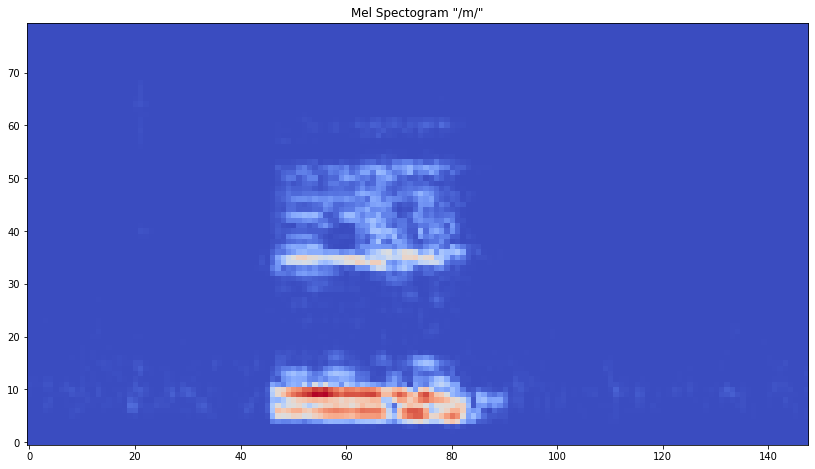

In [55]:
_ = plot_mel_spectrogram(
    viewset[plot_pred_idx]["audio_feats"],
    viewset[plot_pred_idx]["label"])

#### Save Prediction (for WaveGlow)

In [56]:
mel_to_save = torch.squeeze(out_s[plot_pred_idx], 0)[:, 0:80].float()
# mel_to_save = viewset[plot_pred_idx]["audio_feats"]
mel_to_save = torch.tensor(mel_to_save)
mel_fname   = viewset[plot_pred_idx]["label"]
mel_fname   = mel_fname[1:-1] if mel_fname[0] == "/" else mel_fname
mel_fname   = f"{mel_fname}_pred.pt"
torch.save(mel_to_save.T, mel_fname)

C:\Users\win8t\AppData\Local\Temp/ipykernel_9884/193063567.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mel_to_save = torch.tensor(mel_to_save)


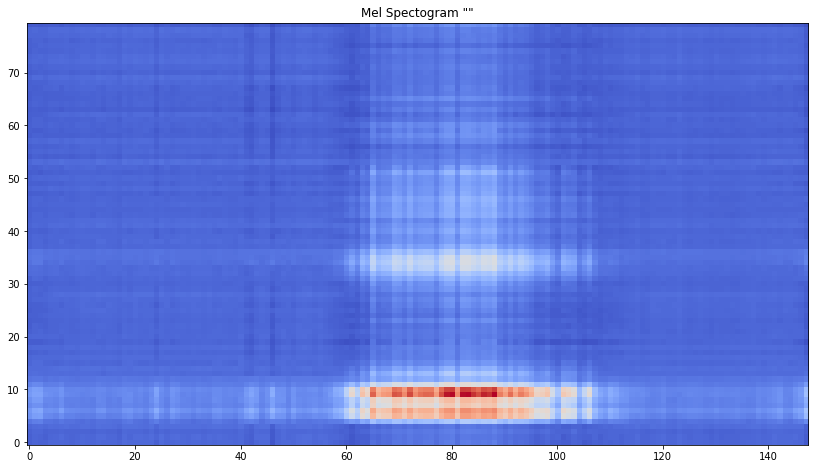

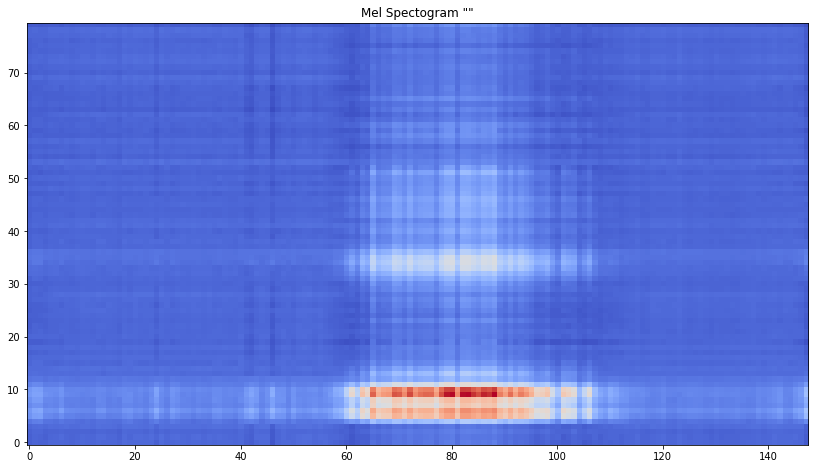

In [57]:
plot_mel_spectrogram(mel_to_save, "")

#### Visualise Vocoded Audio

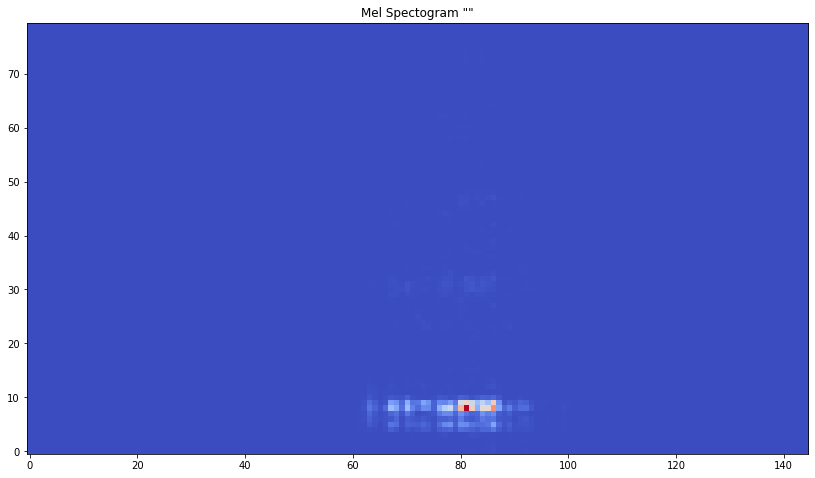

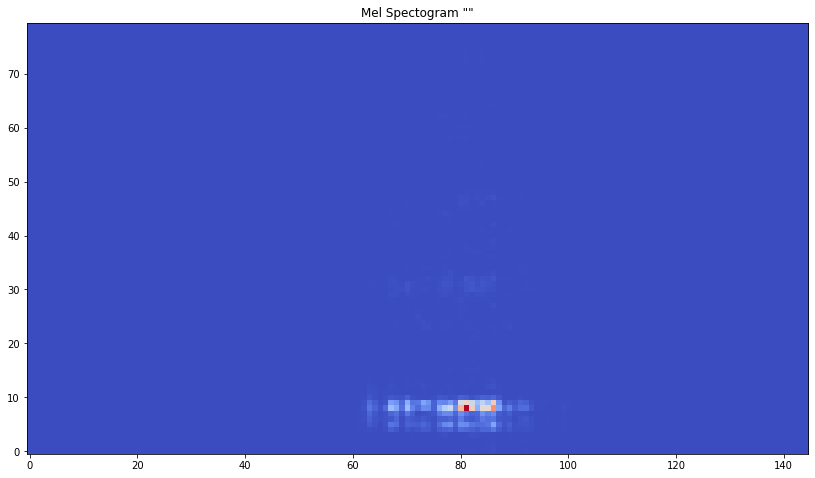

In [58]:
import soundfile as sf
from lib import load_audio
import librosa
n_mel_channels = 80

vocoded_audio_fname = "m_pred_synthesis.wav"
audio, r = sf.read(vocoded_audio_fname)
audio_features = librosa.feature.melspectrogram(
        audio,
        sr=r,
        n_mels=n_mel_channels,
        center=False,
        n_fft=1024,
        win_length=1024,
        hop_length=256).T
audio_features = np.log(audio_features + 1e-5)
plot_mel_spectrogram(audio_features, "")

#### Visualise Any Predicted Mel Spectrogram

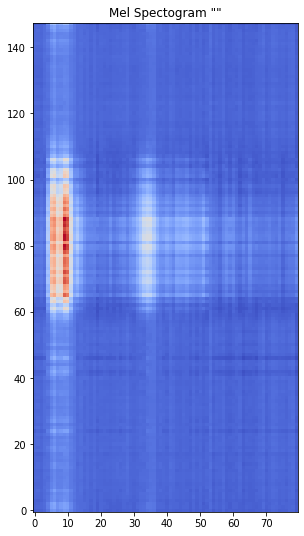

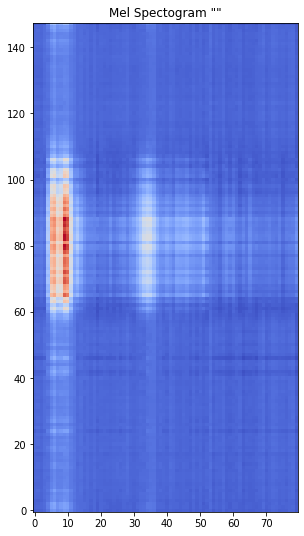

In [59]:
audio_data = torch.load("m_pred.pt")
plot_mel_spectrogram(audio_data, "")